In [ ]:
import pandas as pd
import glob
import seaborn as sns
from plotnine import *

In [ ]:
from knowledge_distillation.io import *

In [ ]:
paths = sorted(glob.glob(str(ASSETS_PATH / '*_evaluation*')))
paths[:5]

['/home/jupyterlab/ni-workspace/notebooks/notebooks/../assets/dummy_ensemble_evaluation.csv',
 '/home/jupyterlab/ni-workspace/notebooks/notebooks/../assets/dummy_evaluation.csv',
 '/home/jupyterlab/ni-workspace/notebooks/notebooks/../assets/identicalnn_0_evaluation.csv',
 '/home/jupyterlab/ni-workspace/notebooks/notebooks/../assets/identicalnn_1_evaluation.csv',
 '/home/jupyterlab/ni-workspace/notebooks/notebooks/../assets/identicalnn_2_evaluation.csv']

In [ ]:
# remove test notebooks
paths = [p for p in paths if 'test_' not in p]

In [ ]:
dfs = [pd.read_csv(p) for p in paths]

In [ ]:
dfs = [df.assign(path = p.split('/')[-1]) for df, p in zip(dfs,paths)]

In [ ]:
results = pd.concat(dfs, ignore_index=True)
results.head()


,model_name,data,accuracy,precision,recall,f1,auc,path
0,dummy_ensemble,train,0.759291,0.0000,0.000000,0.000000,0.500000,dummy_ensemble_evaluation.csv
1,dummy_ensemble,test,0.758790,0.0000,0.000000,0.000000,0.500000,dummy_ensemble_evaluation.csv
2,dummy,train,0.759291,0.0000,0.000000,0.000000,0.500000,dummy_evaluation.csv
3,dummy,test,0.758790,0.0000,0.000000,0.000000,0.500000,dummy_evaluation.csv
4,identicalnn_0,train,0.839028,0.6664,0.663317,0.664855,0.779024,identicalnn_0_evaluation.csv


In [ ]:
from typing import NamedTuple
from pandas.testing import assert_series_equal

# class ModelTypes(NamedTuple):
#     single:str = 'single'
#     ensemble:str = 'ensemble'
#     distilled:str = 'distilled'
        
# model_types = ModelTypes()

def get_model_type(model_names):
    types = []
    for name in model_names:
        ending = name.split("_")[-1]
        if ending == 'ensemble':
            types.append(f'1_{name.split("_")[1]}_ensemble')
        elif ending == 'distilled':
            types.append( f'2_{"_".join(name.split("_")[1:3])}_distilled')
        else:
            types.append('0_single')
            
    return pd.Categorical(
        types, 
#         categories=['single', 'ensemble', distilled]
    )
    
#test
# assert all(get_model_type(['nn_0', 'logr_logit_hard-ensemble_distilled', 'funk_ensemble']) 
#            == ['single', 'logit_hard_distilled', 'ensemble'])


In [ ]:
# all(get_model_type(['nn_0', 'logr_logit_hard-ensemble_distilled', 'funk_ensemble']) 

In [ ]:
results = (results
           .assign(
               model_prefix = results.model_name.apply(lambda x: x.split('_')[0]),
               model_type = get_model_type(results.model_name),
               data = lambda x: pd.Categorical(x.data, categories=['train', 'test'])
           )
          )

results.head()

,model_name,data,accuracy,precision,recall,f1,auc,path,model_prefix,model_type
0,dummy_ensemble,train,0.759291,0.0000,0.000000,0.000000,0.500000,dummy_ensemble_evaluation.csv,dummy,1_ensemble_ensemble
1,dummy_ensemble,test,0.758790,0.0000,0.000000,0.000000,0.500000,dummy_ensemble_evaluation.csv,dummy,1_ensemble_ensemble
2,dummy,train,0.759291,0.0000,0.000000,0.000000,0.500000,dummy_evaluation.csv,dummy,0_single
3,dummy,test,0.758790,0.0000,0.000000,0.000000,0.500000,dummy_evaluation.csv,dummy,0_single
4,identicalnn_0,train,0.839028,0.6664,0.663317,0.664855,0.779024,identicalnn_0_evaluation.csv,identicalnn,0_single


In [ ]:
nn = results.query("model_prefix == 'nn'")
nn

,model_name,data,accuracy,precision,recall,f1,auc,path,model_prefix,model_type
50,nn_10,train,0.846476,0.680267,0.683413,0.681836,0.790791,nn_10_evaluation.csv,nn,0_single
51,nn_10,test,0.844004,0.674858,0.681731,0.678277,0.788660,nn_10_evaluation.csv,nn,0_single
52,nn_1,train,0.840602,0.780753,0.469697,0.586537,0.713941,nn_1_evaluation.csv,nn,0_single
53,nn_1,test,0.840934,0.783669,0.470401,0.587908,0.714561,nn_1_evaluation.csv,nn,0_single
54,nn_2,train,0.836725,0.771760,0.456778,0.573890,0.706976,nn_2_evaluation.csv,nn,0_single
55,nn_2,test,0.837556,0.767466,0.468491,0.581818,0.711684,nn_2_evaluation.csv,nn,0_single
56,nn_3,train,0.833653,0.634607,0.728230,0.678203,0.797652,nn_3_evaluation.csv,nn,0_single
57,nn_3,test,0.832028,0.630828,0.732018,0.677666,0.797919,nn_3_evaluation.csv,nn,0_single
58,nn_4,train,0.831503,0.765453,0.432536,0.552736,0.695260,nn_4_evaluation.csv,nn,0_single
59,nn_4,test,0.828036,0.751955,0.428390,0.545823,0.691734,nn_4_evaluation.csv,nn,0_single


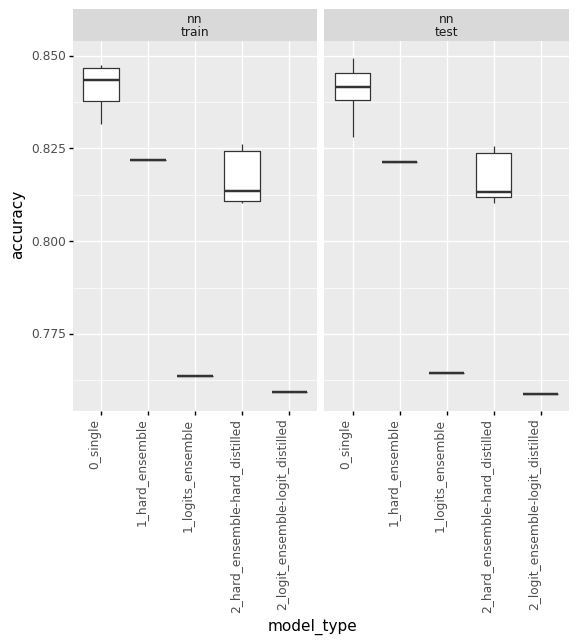

<ggplot: (8759893323027)>

In [ ]:
(ggplot(aes('model_type', 'accuracy'), data=nn.sort_values('model_type'))
 + geom_boxplot()
 + facet_wrap(('model_prefix', 'data'), ncol=2)
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
)


In [ ]:
nn.sort_values(['model_type', 'model_name'])

,model_name,data,accuracy,precision,recall,f1,auc,path,model_prefix,model_type
52,nn_1,train,0.840602,0.780753,0.469697,0.586537,0.713941,nn_1_evaluation.csv,nn,0_single
53,nn_1,test,0.840934,0.783669,0.470401,0.587908,0.714561,nn_1_evaluation.csv,nn,0_single
50,nn_10,train,0.846476,0.680267,0.683413,0.681836,0.790791,nn_10_evaluation.csv,nn,0_single
51,nn_10,test,0.844004,0.674858,0.681731,0.678277,0.788660,nn_10_evaluation.csv,nn,0_single
54,nn_2,train,0.836725,0.771760,0.456778,0.573890,0.706976,nn_2_evaluation.csv,nn,0_single
55,nn_2,test,0.837556,0.767466,0.468491,0.581818,0.711684,nn_2_evaluation.csv,nn,0_single
56,nn_3,train,0.833653,0.634607,0.728230,0.678203,0.797652,nn_3_evaluation.csv,nn,0_single
57,nn_3,test,0.832028,0.630828,0.732018,0.677666,0.797919,nn_3_evaluation.csv,nn,0_single
58,nn_4,train,0.831503,0.765453,0.432536,0.552736,0.695260,nn_4_evaluation.csv,nn,0_single
59,nn_4,test,0.828036,0.751955,0.428390,0.545823,0.691734,nn_4_evaluation.csv,nn,0_single


In [ ]:
results.model_prefix.value_counts()

nn             44
lr             26
identicalnn    20
dummy           4
Name: model_prefix, dtype: int64

# Proof #1 setting the seed produce reproducible results

In [ ]:
nn_same_seed = results.query("model_prefix == 'identicalnn'")

In [ ]:
nn_same_seed.sort_values('data')

,model_name,data,accuracy,precision,recall,f1,auc,path,model_prefix,model_type
4,identicalnn_0,train,0.839028,0.666400,0.663317,0.664855,0.779024,identicalnn_0_evaluation.csv,identicalnn,0_single
6,identicalnn_1,train,0.839028,0.666400,0.663317,0.664855,0.779024,identicalnn_1_evaluation.csv,identicalnn,0_single
20,identicalnn_8,train,0.839028,0.666400,0.663317,0.664855,0.779024,identicalnn_8_evaluation.csv,identicalnn,0_single
8,identicalnn_2,train,0.839028,0.666400,0.663317,0.664855,0.779024,identicalnn_2_evaluation.csv,identicalnn,0_single
10,identicalnn_3,train,0.839028,0.666400,0.663317,0.664855,0.779024,identicalnn_3_evaluation.csv,identicalnn,0_single
18,identicalnn_7,train,0.839028,0.666400,0.663317,0.664855,0.779024,identicalnn_7_evaluation.csv,identicalnn,0_single
12,identicalnn_4,train,0.839028,0.666400,0.663317,0.664855,0.779024,identicalnn_4_evaluation.csv,identicalnn,0_single
22,identicalnn_9,train,0.839028,0.666400,0.663317,0.664855,0.779024,identicalnn_9_evaluation.csv,identicalnn,0_single
14,identicalnn_5,train,0.839028,0.666400,0.663317,0.664855,0.779024,identicalnn_5_evaluation.csv,identicalnn,0_single
16,identicalnn_6,train,0.839028,0.666400,0.663317,0.664855,0.779024,identicalnn_6_evaluation.csv,identicalnn,0_single


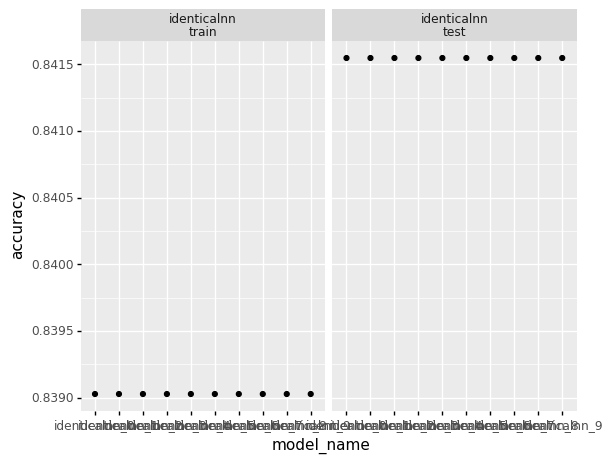

<ggplot: (8759946756455)>

In [ ]:
(ggplot(aes('model_name', 'accuracy'), data=nn_same_seed)
 + geom_point()
 + facet_wrap(('model_prefix', 'data'), ncol=2)
)



In [ ]:
lr = results.query("model_prefix == 'lr'")

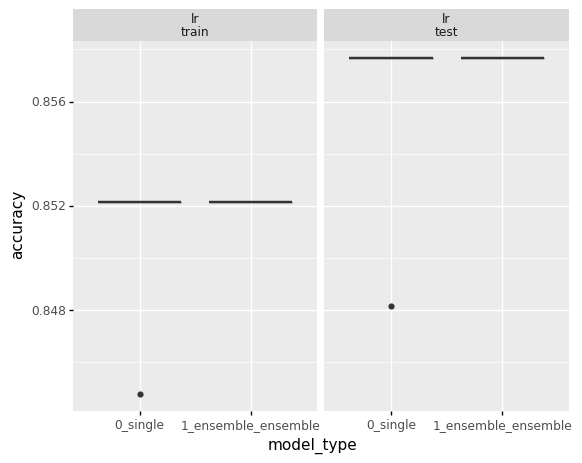

<ggplot: (8759892542103)>

In [ ]:
(ggplot(aes('model_type', 'accuracy'), data=lr)
 + geom_boxplot()
 + facet_wrap(('model_prefix', 'data'), ncol=2)
)

